In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('p4clean.csv')

In [20]:
df["JOB_SEARCH"] = df["JOB_SEARCH"].fillna(0)

In [179]:
X = df.drop("JOB_SEARCH", axis = 1)
X = X.fillna(-999)
#X = df["JOB_SATISFACTION"]
#X = pd.DataFrame(X)
y = df["JOB_SEARCH"]

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [169]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [170]:
y_pred = pd.Series(clf.predict(X_test))

In [176]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Accuracy: 0.93026706231454
Precision: 0.061946902654867256
Recall: 0.07865168539325842
F1: 0.0693069306930693


In [151]:
confusion_matrix(y_test, y_pred)

array([[2509,   98],
       [  80,    9]])

In [153]:
ploty = y.astype("int64")

<ipython-input-154-c10f216aff12>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks().astype("int64"), size = 16)


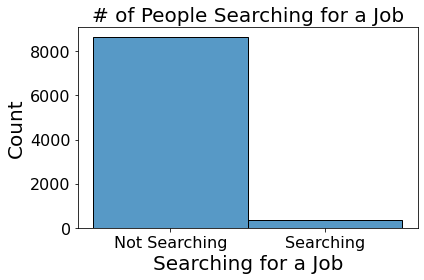

In [154]:
ax = sns.histplot(ploty, bins = 2)
ax.set_xlabel("Searching for a Job", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_xticks([.25, .75], ["Not Searching", "Searching"], fontsize = 16)
ax.set_yticklabels(ax.get_yticks().astype("int64"), size = 16)
ax.set_title("# of People Searching for a Job", size = 20)
plt.tight_layout()
plt.savefig("dist.png")